In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import StringIO
import datetime
%matplotlib inline

In [10]:
url='http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source=requests.get(url).text
poll_data=StringIO.StringIO(source)
poll_df=pd.read_csv(poll_data)
poll_data.close()

In [12]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [13]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


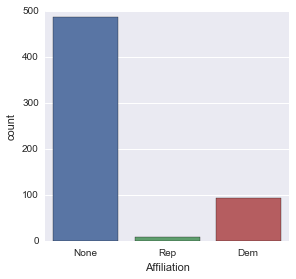

In [15]:
sns.factorplot('Affiliation',data=poll_df,kind='count')

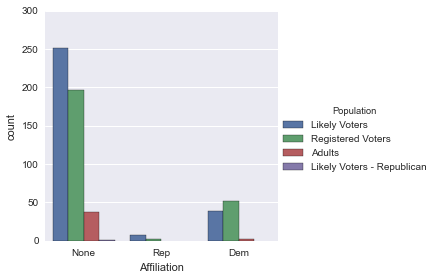

In [16]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [28]:
sum(poll_df['Obama'].isnull()),sum(poll_df['Romney'].isnull()),sum(poll_df['Undecided'].isnull())

(0, 0, 167)

In [24]:
avg=poll_df[['Obama','Romney','Undecided']].mean()
avg

Obama        46.772496
Romney       44.573854
Undecided     6.549763
dtype: float64

In [29]:
std=poll_df[['Obama','Romney','Undecided']].std()
std

Obama        2.448627
Romney       2.927711
Undecided    3.702235
dtype: float64

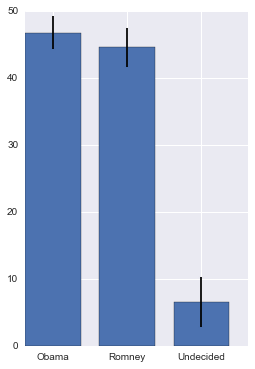

In [50]:
fig, ax = plt.subplots(figsize=(4, 6))
ind=range(len(avg))
width=0.75
ax.bar(ind,avg,width,yerr=std,ecolor='black')
ax.set_xticks([ x + width/2 for x in ind ])
ax.set_xticklabels(avg.index)

In [64]:
poll_avg=pd.concat([avg,std],axis=1,keys=['Avg','Std'])
poll_avg

,Avg,Std
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


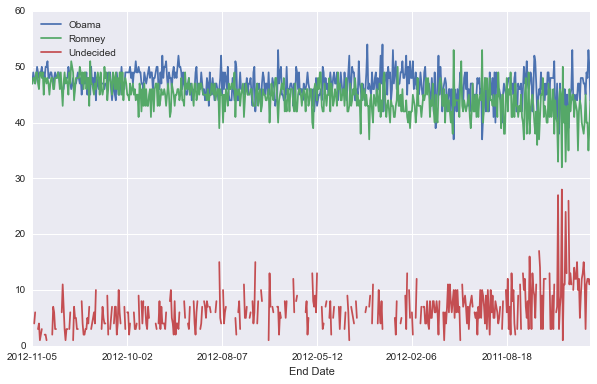

In [71]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],figsize=(10, 6))

In [73]:
poll_df['Difference']=poll_df['Obama']-poll_df['Romney']

In [89]:
grouped_poll_df=poll_df[['End Date',
                         'Obama',
                         'Romney',
                         'Undecided',
                         'Difference']].groupby(['End Date'],as_index=False).mean()
grouped_poll_df['End Date']=grouped_poll_df['End Date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").date())
grouped_poll_df.head()

,End Date,Obama,Romney,Undecided,Difference
0,2009-03-15,44,44,12,0
1,2009-04-19,50,39,11,11
2,2009-05-18,53,35,12,18
3,2009-06-16,48,40,12,8
4,2009-07-16,49,40,11,9


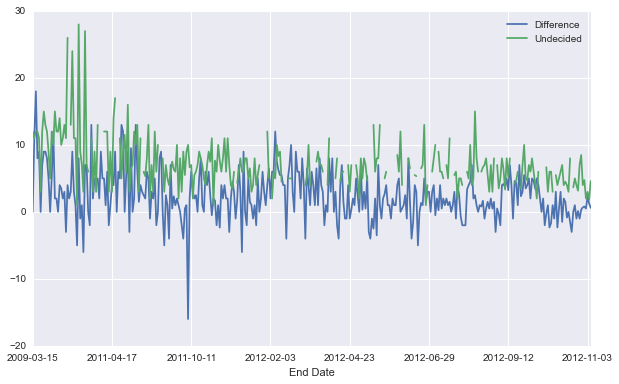

In [79]:
grouped_poll_df.plot(x='End Date',y=['Difference','Undecided'],figsize=(10, 6))

In [96]:
month_201210=grouped_poll_df[(grouped_poll_df['End Date']>=datetime.date(2012,10,1)) & \
                             (grouped_poll_df['End Date']<=datetime.date(2012,10,31))]
month_201210.head()

,End Date,Obama,Romney,Undecided,Difference
318,2012-10-01,49.0,44.0,2,5
319,2012-10-02,49.0,45.0,6,4
320,2012-10-03,49.0,47.0,NaN,2
321,2012-10-04,47.5,47.5,5,0
322,2012-10-05,46.0,44.0,NaN,2


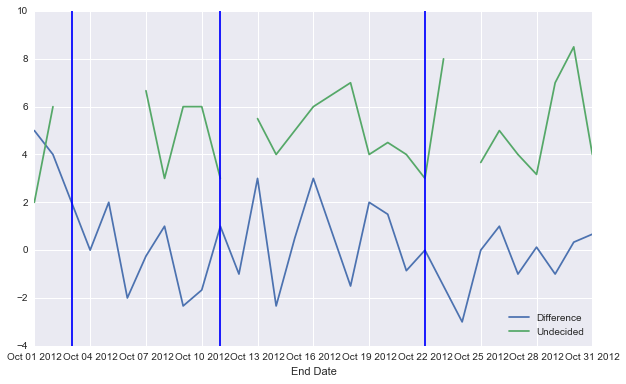

In [99]:
month_201210.plot(x='End Date',y=['Difference','Undecided'],figsize=(10, 6))
debates=[datetime.date(2012,10,3),
         datetime.date(2012,10,11),
         datetime.date(2012,10,22)]
for debate in debates:
    plt.axvline(debate)

In [113]:
donor_df=pd.read_csv('Election_Donor_Data.csv')
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [102]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 129.9+ MB


In [105]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 236.07          1
 153.60          1
 116.35          1
 233.33          1
 86.21           1
 600.74          1
 130.20          1
 50.04           1
 78.55           1
 266.10          1
 77.83           1
 222.75          1
 217.75          1
 261.50          1
 240.25          1
-45.50           1
 161.50          1
 268.76          1
 100.56          1
 6.26            1
 114.43          1
 823.88     

In [108]:
donor_df['contb_receipt_amt'].max(),donor_df['contb_receipt_amt'].min()

(2014490.51, -30800.0)

In [109]:
avg,std=donor_df['contb_receipt_amt'].mean(),donor_df['contb_receipt_amt'].std()
avg,std

(298.2351500951093, 3749.6667232690429)

In [110]:
donor_df['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [119]:
donor_df['Party']='Republican'
donor_df.loc[donor_df['cand_nm']=='Obama, Barack','Party']='Democrat'

In [120]:
(donor_df['Party']=='Republican').sum(),(donor_df['Party']=='Democrat').sum()

(407985, 593746)

In [121]:
pos_donor_df=donor_df[donor_df['contb_receipt_amt']>0]
pos_donor_df['contb_receipt_amt'].min()

0.01

In [124]:
pos_donor_df.groupby('cand_nm')['contb_receipt_amt'].count().sort_values()

cand_nm
McCotter, Thaddeus G                  73
Johnson, Gary Earl                  1234
Pawlenty, Timothy                   3844
Huntsman, Jon                       4066
Roemer, Charles E. 'Buddy' III      5844
Perry, Rick                        12709
Bachmann, Michelle                 13082
Cain, Herman                       20052
Santorum, Rick                     46245
Gingrich, Newt                     46883
Romney, Mitt                      105155
Paul, Ron                         143161
Obama, Barack                     589127
Name: contb_receipt_amt, dtype: int64

In [125]:
pos_donor_df.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values()

cand_nm
McCotter, Thaddeus G              3.903000e+04
Roemer, Charles E. 'Buddy' III    3.730099e+05
Johnson, Gary Earl                5.669616e+05
Bachmann, Michelle                2.711439e+06
Huntsman, Jon                     3.330373e+06
Pawlenty, Timothy                 6.004819e+06
Cain, Herman                      7.101082e+06
Santorum, Rick                    1.104316e+07
Gingrich, Newt                    1.283277e+07
Perry, Rick                       2.030575e+07
Paul, Ron                         2.100962e+07
Romney, Mitt                      8.833591e+07
Obama, Barack                     1.358774e+08
Name: contb_receipt_amt, dtype: float64

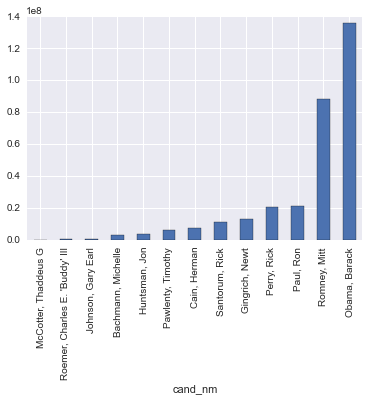

In [126]:
pos_donor_df.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values().plot(kind='bar')

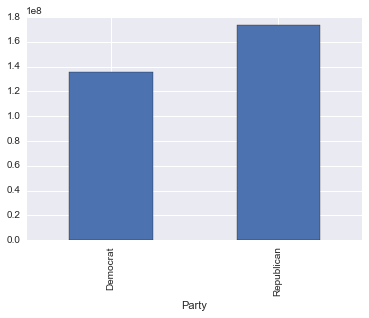

In [128]:
pos_donor_df.groupby('Party')['contb_receipt_amt'].sum().sort_values().plot(kind='bar')

In [130]:
occupation_df=pos_donor_df.pivot_table('contb_receipt_amt',
                                       index='contbr_occupation',
                                       columns='Party',
                                       aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN


In [131]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45067 entries,    MIXED-MEDIA ARTIST / STORYTELLER to ~
Data columns (total 2 columns):
Democrat      29166 non-null float64
Republican    21081 non-null float64
dtypes: float64(2)
memory usage: 1.0+ MB


In [147]:
fil_occupation_df=occupation_df[occupation_df.sum(axis=1)>1000000]
fil_occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41


In [136]:
fil_occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, ATTORNEY to WRITER
Data columns (total 2 columns):
Democrat      30 non-null float64
Republican    31 non-null float64
dtypes: float64(2)
memory usage: 744.0+ bytes


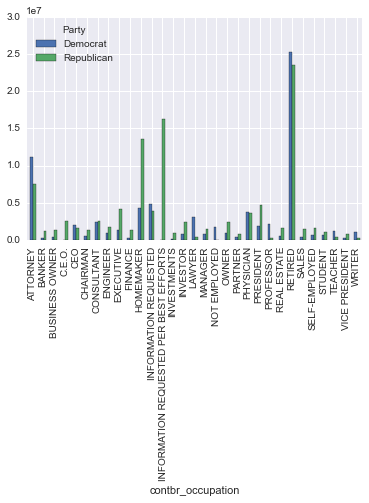

In [138]:
fil_occupation_df.plot(kind='bar')

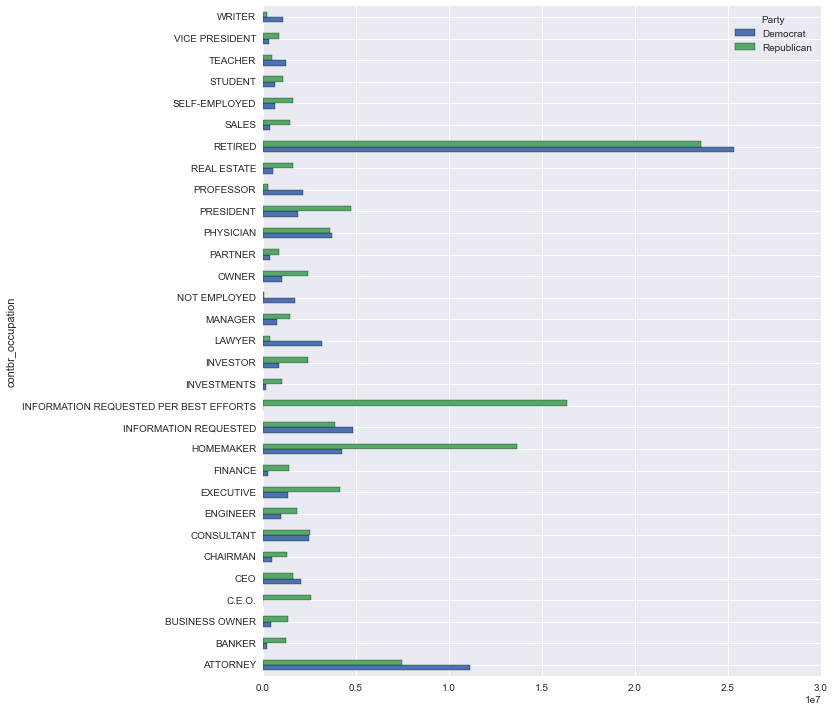

In [140]:
fil_occupation_df.plot(kind='barh',figsize=(10,12))

In [148]:
fil_occupation_df.loc['CEO']=fil_occupation_df.loc['CEO']+fil_occupation_df.loc['C.E.O.']
fil_occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS',
                        'INFORMATION REQUESTED',
                        'C.E.O.'],inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


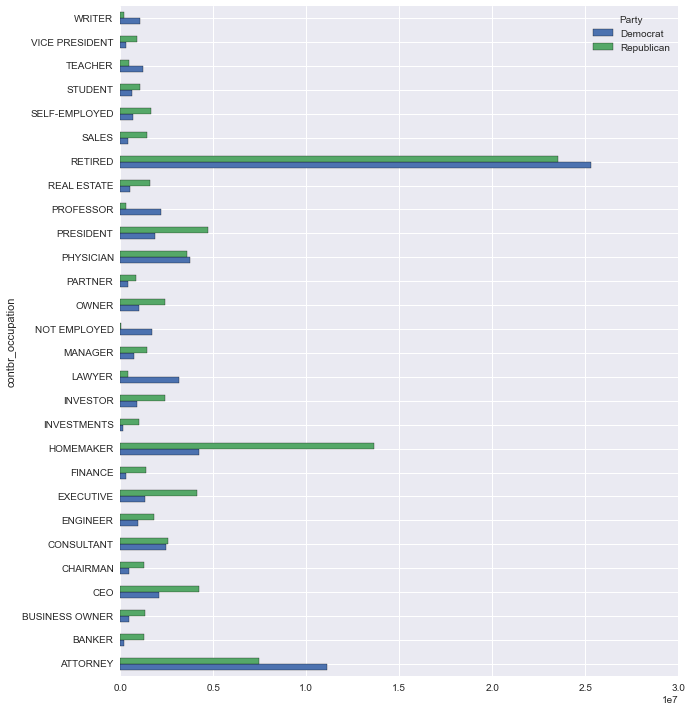

In [149]:
fil_occupation_df.plot(kind='barh',figsize=(10,12))